Effects of Covid on the NYC Yellow Taxi

In [1]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium as fol

First, lets import our Taxi Data and clean it for use later on.

In [2]:
overall_data = pd.read_csv('overall_data.csv')

In [3]:
overall_data["pickup_datetime"] = pd.to_datetime(overall_data['pickup_datetime'])
overall_data['dropoff_datetime'] = pd.to_datetime(overall_data['dropoff_datetime'])

In [4]:
overall_data['payment_type']

0                  cash
1           credit_card
2           credit_card
3           credit_card
4                  cash
               ...     
13099945           cash
13099946           cash
13099947    credit_card
13099948           cash
13099949    credit_card
Name: payment_type, Length: 13099950, dtype: object

Next, we will need to bring in the Covid data that we plan to work with. The Covid-19 data is in a csv file downloaded from the CDC.

We will start with the Covid data.

In [5]:
covid_df = pd.read_csv("covid data\covidreportsbystate.csv")

In [6]:
covid_df.dropna(inplace=True)

In [7]:
covid_df["submission_date"] = pd.to_datetime(covid_df["submission_date"])

In [8]:
covid_df["created_at"] = pd.to_datetime(covid_df["created_at"])

In [9]:
final_covid_df = covid_df.loc[covid_df['state'] == 'NYC']
final_covid_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
2405,2020-03-02,NYC,1,1.0,0.0,1,0.0,0,0.0,0.0,0,0.0,2020-02-29 00:00:00,Agree,Agree
2462,2020-03-03,NYC,1,1.0,0.0,0,0.0,0,0.0,0.0,0,0.0,2020-03-01 00:00:00,Agree,Agree
2575,2020-03-04,NYC,1,1.0,0.0,0,0.0,1,1.0,0.0,1,0.0,2020-03-02 00:00:00,Agree,Agree
2594,2020-03-05,NYC,2,2.0,0.0,1,0.0,1,1.0,0.0,0,0.0,2020-03-03 00:00:00,Agree,Agree
2691,2020-03-06,NYC,7,7.0,0.0,5,0.0,1,1.0,0.0,0,0.0,2020-03-04 00:00:00,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59774,2022-10-14,NYC,2902815,2447510.0,455305.0,0,0.0,42150,36494.0,5656.0,0,0.0,2022-10-15 13:14:00,Agree,Agree
59870,2022-10-15,NYC,2902815,2447510.0,455305.0,0,0.0,42150,36494.0,5656.0,0,0.0,2022-10-16 13:16:00,Agree,Agree
59880,2022-10-16,NYC,2908749,2452178.0,456571.0,5934,1266.0,42158,36503.0,5655.0,8,-1.0,2022-10-17 13:39:00,Agree,Agree
59951,2022-10-17,NYC,2910369,2453333.0,457036.0,1620,465.0,42192,36531.0,5661.0,34,6.0,2022-10-18 13:16:00,Agree,Agree


Now we have a DataFrame for our Covid data that we can work with.

In [10]:
covid_taxi = overall_data.where(overall_data['is_covid_rel'] == True)

In [11]:
covid_taxi.dropna(inplace=True)

In [12]:
covid_taxi['year'] = covid_taxi['year'].astype(int)

Now lets begin to explore the data

<AxesSubplot: title={'center': 'Average Passenger Count by Year'}, xlabel='year'>

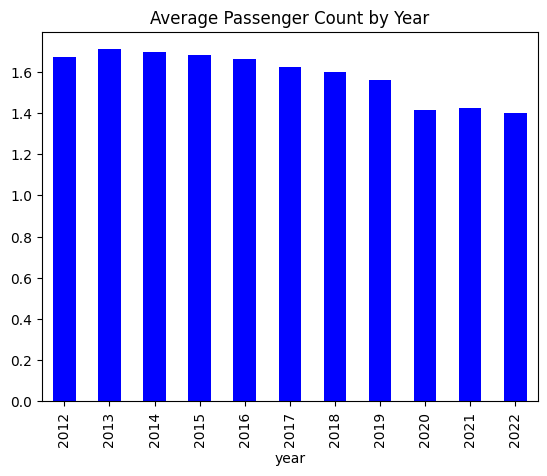

In [13]:
#create a graph of the average number of passengers per ride per year
passenger_count = overall_data.groupby('year')['passenger_count'].mean()
passenger_count.plot(kind='bar', title='Average Passenger Count by Year', color='blue')

C:\Users\william.ballentine\AppData\Local\Temp\ipykernel_1412\3754808802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_covid_df['year'] = final_covid_df['submission_date'].dt.year


<AxesSubplot: title={'center': 'Covid Cases by Year'}, xlabel='year'>

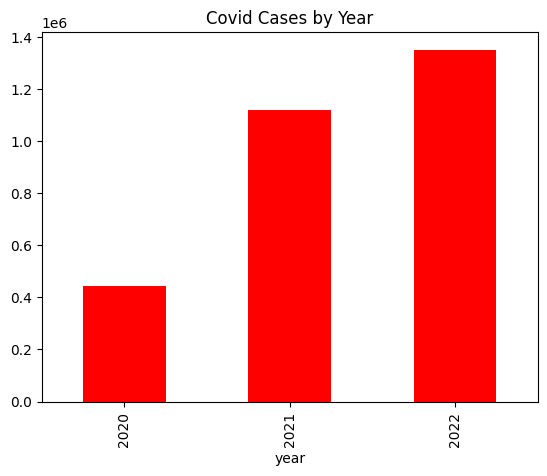

In [14]:
#overlay the number of covid cases per year
final_covid_df['year'] = final_covid_df['submission_date'].dt.year
covid_cases = final_covid_df.groupby('year')['new_case'].sum()
covid_cases.plot(kind='bar', title='Covid Cases by Year', color='red')

In [15]:
#plot the number of rides that paid with credit card in 2019
credit_2019 = overall_data[overall_data['payment_type'] == 'credit_card']
credit_2019 = credit_2019.groupby('year')['payment_type'].count()


In [16]:
#plot the number of rides that paid with cash after 2019
cash_2019 = overall_data[overall_data['payment_type'] == 'cash']
cash_2019 = cash_2019.groupby('year')['payment_type'].count()



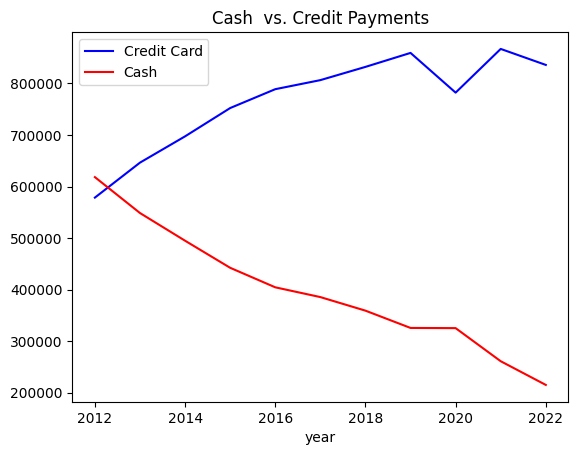

In [17]:
#overlay cash_2019 and credit_2019 side by side to compare on the same graph with a legend
fig, ax = plt.subplots()
credit_2019.plot(title='Credit Card Payments', color='blue', ax=ax)
cash_2019.plot(title='Cash  vs. Credit Payments', color='red', ax=ax)
ax.legend(['Credit Card', 'Cash'])


<AxesSubplot: title={'center': 'Average Fare Amount by Year'}, xlabel='year', ylabel='Fare Amount'>

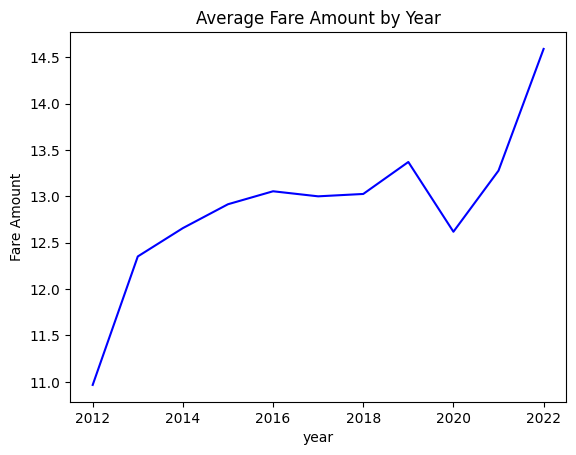

In [18]:
#plot the average fare amount per year
fare_amount = overall_data.groupby('year')['fare_amount'].mean()
fare_amount.plot(title='Average Fare Amount by Year', color='blue', ylabel='Fare Amount')
